In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer, StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [2]:
train=pd.read_csv('loantrain.csv', index_col='Loan_ID')


train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [5]:
train['Gender'].describe()

count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object

In [6]:
train['Gender'].fillna(str(train.Gender.mode()),inplace=True)


In [7]:
train['Married'].describe()

count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object

In [8]:
train['Married'].fillna(str(train.Married.mode()),inplace=True)


In [9]:
train['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

In [10]:
train['Dependents'].fillna(str(train.Dependents.mode()),inplace=True)


In [11]:
train['Self_Employed'].describe()

count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object

In [12]:
train['Self_Employed'].fillna(str(train.Self_Employed.mode()),inplace=True)


In [13]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [14]:
train.LoanAmount.isnull().sum()

22

In [15]:
train.LoanAmount.median()

128.0

In [16]:

train['LoanAmount'].fillna(train.LoanAmount.median(),inplace=True)


In [17]:
train['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

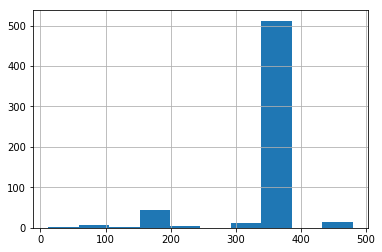

In [18]:
train['Loan_Amount_Term'].hist()


In [19]:
train['Loan_Amount_Term'].fillna(train.Loan_Amount_Term.median(),inplace=True)


In [20]:


train['Credit_History'] = train['Credit_History'].astype('str')


In [21]:
train['Credit_History'].describe()

count     614
unique      3
top       1.0
freq      475
Name: Credit_History, dtype: object

In [22]:
train.Credit_History.mode()

0    1.0
dtype: object

In [23]:

train['Credit_History'].fillna(train.Credit_History.mode(),inplace=True)


In [24]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null object
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 62.4+ KB


In [27]:
train['Dependents'] = train['Dependents'].str.replace("+","")


In [28]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [29]:
mmodus = ['Gender','Married','Self_Employed','Dependents','Credit_History']
mmean = ['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']

In [30]:
for feature in mmean:
        if feature in train.columns.values:
            train[feature] = train[feature].fillna(train[feature].mean())
            
for feature in mmodus:
        if feature in train.columns.values:
            train[feature] = train[feature].fillna(train[feature].value_counts().index[0])

In [31]:
category = ['Gender','Married','Education','Self_Employed','Dependents','Credit_History', 'Property_Area','Loan_Status']
for feature in category:
        if feature in train.columns.values:
            train[feature] = LabelEncoder().fit_transform(train[feature])

In [32]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,2,1,0,0,1,5849,0.0,128.0,360.0,1,2,1
LP001003,2,2,2,0,1,4583,1508.0,128.0,360.0,1,0,0
LP001005,2,2,0,0,2,3000,0.0,66.0,360.0,1,2,1
LP001006,2,2,0,1,1,2583,2358.0,120.0,360.0,1,2,1
LP001008,2,1,0,0,1,6000,0.0,141.0,360.0,1,2,1


In [49]:
x=train.drop('Loan_Status',axis=1)
y=train["Loan_Status"]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,2,1,0,0,1,5849,0.0,128.0,360.0,1,2
LP001003,2,2,2,0,1,4583,1508.0,128.0,360.0,1,0
LP001005,2,2,0,0,2,3000,0.0,66.0,360.0,1,2
LP001006,2,2,0,1,1,2583,2358.0,120.0,360.0,1,2
LP001008,2,1,0,0,1,6000,0.0,141.0,360.0,1,2


In [34]:
cv=StratifiedKFold(n_splits=5,random_state=5)

In [48]:
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Gradient Boosting', GradientBoostingClassifier()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('MLP', MLPClassifier ( max_iter=1000)))

results = []
names = []
tabel=[]
for name, model in models:
    accuracy=cross_val_score(model, x, y,cv=cv)
    results.append(accuracy)
    names.append(name)
    hasil = "%s: %f" % (name, accuracy.mean())
    tabel.append(hasil)
tabel


/home/av/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/av/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/av/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/av/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:

['CART: 0.718244',
 'KNN: 0.612374',
 'Naive Bayes: 0.785140',
 'SVM: 0.690587',
 'Random Forest: 0.737943',
 'Bagging: 0.731438',
 'AdaBoost: 0.785114',
 'Gradient Boosting: 0.790111',
 'Logistic Regression: 0.806293',
 'MLP: 0.613696']

In [36]:
test=pd.read_csv("loantest.csv", index_col='Loan_ID')
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 34.4+ KB


In [38]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [39]:
test['Gender'].fillna(str(test.Gender.mode()),inplace=True)
test['Married'].fillna(str(test.Married.mode()),inplace=True)
test['Dependents'].fillna(str(test.Dependents.mode()),inplace=True)

test['Self_Employed'].fillna(str(test.Self_Employed.mode()),inplace=True)
test['LoanAmount'].fillna(test.LoanAmount.median(),inplace=True)
test['Loan_Amount_Term'].fillna(test.Loan_Amount_Term.median(),inplace=True)

test['Credit_History'] = test['Credit_History'].astype('str')

test['Credit_History'].fillna(test.Credit_History.mode(),inplace=True)

In [40]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [41]:
mmodus = ['Gender','Married','Self_Employed','Dependents','Credit_History']
mmean = ['LoanAmount','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term']

In [42]:
for feature in mmean:
        if feature in test.columns.values:
            test[feature] = test[feature].fillna(test[feature].mean())
            
for feature in mmodus:
        if feature in test.columns.values:
            test[feature] = test[feature].fillna(test[feature].value_counts().index[0])

In [43]:
kategori = ['Gender','Married','Education','Self_Employed','Dependents','Credit_History', 'Property_Area','Loan_Status']
for feature in kategori:
        if feature in test.columns.values:
            test[feature] = LabelEncoder().fit_transform(test[feature])

In [44]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,2,1,0,0,1,5720,0,110.0,360.0,1,2
LP001022,2,1,2,0,1,3076,1500,126.0,360.0,1,2
LP001031,2,1,3,0,1,5000,1800,208.0,360.0,1,2
LP001035,2,1,3,0,1,2340,2546,100.0,360.0,2,2
LP001051,2,0,0,1,1,3276,0,78.0,360.0,1,2


In [45]:
model=LogisticRegression(class_weight='balanced')
cross_val_score(model, x, y,cv=cv).mean()

/home/av/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/av/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/av/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/av/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/av/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

0.7329190904283448

In [46]:
model.fit(x,y)
y_predict=model.predict(test)
y_predict

/home/av/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,

In [47]:
y_predict=pd.DataFrame(y_predict,columns =['Loan_Status'],index=test.index)
y_predict['Loan_Status']= y_predict['Loan_Status'].map({1: 'Y', 0: 'N'})
y_predict.to_csv("loansample.csv")
y_predict.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,N
